# 第六章 贷款按揭分析

## 概念和符号表示
FV为终值，PV为现值，T为时间，R为利率

## 货币时间价值

银行存款利率为5%，若想3年后获得10000元，现在需要存入多少钱？

### 单利终值和现值

In [1]:
import numpy as np
FV = 10000;T=3;r=0.05
PV  =10000/(1+0.05*3)
print ('现在应该往银行存入%.2f元' % PV)

现在应该往银行存入8695.65元


### 复利终值和现值
复利顾名思义，就是指在借贷过程中，不仅本金要计算利息，而且本金所产生的利息也要在 下期开始计算利息，也就是所谓的“利滚利” 。

In [2]:
FV = 10000;T=3;r=0.05
PV  =10000/(1+0.05)**3
print ('现在应该往银行存入%.2f元' % PV)
PV  =10000/(1+0.05/2)**6
print ('现在应该往银行存入%.2f元' % PV)

现在应该往银行存入8638.38元
现在应该往银行存入8622.97元


### 连续复利
连续复利是指，期数趋于无限大的情况下得到的利率，此时不同时期的间隔很短，例如，在借贷过程中 ，利息每个月支付一次或者每天支付一次，在这种情况下，就叫做连续复利

In [3]:
#年化利率为5%，按照每个月复利一次
PV  =10000* np.exp(-3*r)
print ('现在应该往银行存入%.2f元' % PV)

现在应该往银行存入8607.08元


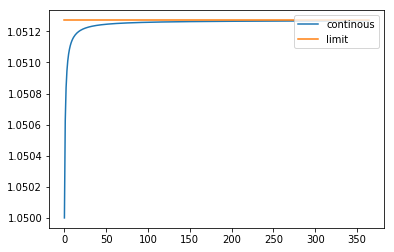

In [5]:
# 调整复利计息频数
# 计算实际每年收益率
R_continous =[]
R = 0.05
for i in range(1,366):
    r = (1+R/i)**i
    R_continous.append(r)
limit = np.ones(len(R_continous))* np.exp(R)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(R_continous,label='continous')
plt.plot(limit,label = 'limit' )
plt.legend(loc='upper right')
#plt.title('')
plt.show()

## 固定现金流计算

以国债为例，10年期面值为1000元的国债，票面利率为5%，并在第十年收到1000元本金，假设贴现 率为6%，贴现周期为10年，利息为50元，那么现值和终值计算公式为:

In [15]:
# 固定现金流计算PV
FaceValue = 1000
Payment =1000*0.05 # 债券收益(每期)
Rate = 0.06 #贴现率
final_payment = 1000 #到期还本,也可以理解为FV
Num = 10
Due = 0 #现金流计息方式(0为周期末付息，1为周期内付息)

In [16]:
Presentvalue = abs(np.pv(Rate,Num,Payment,final_payment,Due))
print ('当前现值为%.2f元' % Presentvalue)

当前现值为926.40元


In [17]:
# 固定现金流计算FV
FutureValue = abs(np.fv(Rate,Num,Payment,final_payment,Due))
print ('当前终值为%.2f元' % FutureValue)

当前终值为2449.89元


In [18]:
#用自己编写函数
def PV(face_value, payment, num,r):
    Pv_v = 0  # 初始值(是每期收益贴现后的现值
    for i in range(1,num+1):
        pv = 50/(1+r)**i
        Pv_v  = Pv_v + pv
    face_value_p = face_value/(1+r)**num #最后一次现金流贴现
    return Pv_v + face_value_p

Presentvalue = PV(1000, 50, 10,0.06)
print ('当前现值为%.2f元' % Presentvalue)

当前现值为926.40元


In [19]:
#用自己编写函数
def FV(face_value, payment, num,r):
    Fv_v = 0
    for i in np.arange(0, 10):
        fv = 50*(1+r)**i
        Fv_v  = Fv_v + fv
    face_value_f = face_value*(1+r)**num
    return Fv_v + face_value_f

Future_value = FV(1000, 50, 10,0.06)
print ('终值为%.2f元' % Future_value )

终值为2449.89元


## 变化现金流计算

在实际项目投资中，每期产生的现金流可能是变化的，比如投资买了一台设备，该设备带来的现 金流是变化的，这个时候也需要测算投资时候合适，通常测算投资是否合适，往往有两种方法比 较适合。

### NPV
投资项目投入使用后的净现金流量，按资本成本或企业要求达到的报酬率折算为现值，减去初始 投资以后的余额，叫净现值(net present value,NPV)

In [20]:
# NPV
import scipy as sp
cashflows=[-10000,3000,3500,7000,8000,2000]
sp.npv(0.112,cashflows)
if sp.npv(0.112,cashflows) > 0:
    print ('投资可以接受')
else:
    print('投资不可行')

投资可以接受


### IRR
内部收益率(IRR),就是资金流入现值总额与资金流出现值总额相等时，即净现值等于0时的折现率 ，可以理解为一项项目渴望达到的报酬率，一般情况下，内部收益率大于必要收益率时，该项目 可行，否则，不可行。

$$-Invest + \sum_{i=0}^n \frac {CF_i}{(1+Rate)^i} = 0$$
求解Rate  
这个Rate就是使得净现值等于0时的内部收益率，该指标越大越好

In [21]:
# IRR
# 计算IRR
cashflows = [-6000,2500,1500,3000,1000,2000]
IRR = np.irr(cashflows)
print('内部收益率为: %.4f%%' % (100*IRR))

内部收益率为: 21.1762%


In [22]:
#使用函数
def IRR_rate(initial_invest,cash_flow,R):
    cash_total = 0
    for i in range(0,len(cash_flow)):
        cash_in = cash_flow[i]/(1+R)**(i+1)
        cash_total = cash_total +cash_in
    npv = initial_invest + cash_total
    return npv
# 用数值方法求解
from scipy.optimize import fsolve
initial_invest = -6000
cash_flow = [2500,1500,3000,1000,2000]

irr = fsolve(lambda R: IRR_rate(initial_invest,cash_flow,R),0.08)
print('内部收益率为: %.4f%%' % (100*irr))

内部收益率为: 21.1762%


## 年金现金流计算
是在定期或者不定期的时间内一系列的现金流入或者流出，年金终值包括各年存入的本金相加以 及各年存入的本金所产生的利息，以按揭贷款为例

* 例如，投资者贷款50万元买房，还款期限10年，每月还款3000，贷款利率为多少 

In [23]:
#计算年化利率
Num =240
payment =-3000
PV =500000
FV =0
due = 0 #期末还款
Rate = np.rate(Num,payment,PV,FV,due)
print('年化利率为: %.4f%%' % (100*Rate*12))

年化利率为: 3.8862%


* 例如，投资者贷款50万元买房，利率不变，每月还款4000，还款期限为多少

In [24]:
#计算周期
rate = 0.038862/12
payment =-4000
PV =500000
FV =0
Periods = np.nper(rate,payment,PV,FV,when='end')
print('周期为:%s' % Periods )

周期为:160.48125328325278


## 按揭贷款分析
在商业按揭贷款中，通常有两种方式比较常见 
* 等额还款
* 等额本金还款

### 等额还款
假设贷款本金50万元，10年共还款120期，年贷款利率为5%，若每月还款5000元，则贷款余额为 多少

In [25]:
# 等额还款
def Ajfixpayment(MP,Num,B,rate):
    # MP 月还款额
    # Num 期数
    # B 贷款本金
    # rate 贷款利率
    # 初始化相关变量
    # 初始化行向量，用来存储每次循环的值
    IR = [0] * Num # 月利息
    YE = [0] * Num  # 贷款余额
    BJ = [0] * Num  # 每月偿还本金
    # 第一个月初贷款余额等于本金
    YE[0] = B
    for i in range(Num):
        IR[i] = Rate * YE[i]
        BJ[i] = MP - IR[i]
        # 不是最后一次还款
        if i < Num - 1:
            YE[i+1] = YE[i] - BJ[i] #第i+1期本金等于第i期本金 - 第i期归还本金
    return B - sum(BJ) #剩余本金

#设置相关参数
Num =120
B = 500000
Rate = 0.05/12
MP = 5000
F = Ajfixpayment(MP,Num,B,Rate)
print ('贷款余额还剩下: %.2f' % F)

贷款余额还剩下: 47093.35


假设贷款本金50万元，10年共还款120期，年贷款利率为5%，10年后还清，每月应该还多少?

In [26]:
#找到MP(每月应该还款多少)
from scipy.optimize import fsolve
# 初始值5000
Mpo = 5000
MP = fsolve(lambda MP: Ajfixpayment(MP,Num,B,Rate), Mpo)
print ('每月贷款应还款为%.2f元' % MP)

#用公式
r =0.05/12
MP = 500000* (r*(1+r)**120)/ ((1+r)**120 -1 )
print ('每月贷款应还款为%.2f元' % MP)

每月贷款应还款为5303.28元
每月贷款应还款为5303.28元


### 等额本金还款
借款人每期偿还等额本金，同时付清每个月的贷款利息，所以每期归还的本金等于贷款总额除以 贷款期数
 假设 R为月贷款利率, B为贷款本金, MB为月还本金,n 为期限

In [1]:
# # # # # # 等额本金还款
def AJvarPayment(Num,B,Rate):
    MB = B/Num #每月本金
    # 初始化相关变量
    IR = [0]*Num #每月利息
    YE = [0]*Num #每月贷款余额
    MP = [0]*Num  #每月还款额
    YE[0] = B
    for i in range(0,Num):
        IR[i] = YE[i] * Rate
        MP[i] = MB + IR[i]
        if i < Num - 1:
            YE[i + 1] = YE[i] - MB
    return MP
# 设置参数
Rate = 0.05/12
Num =120
B =500000
MP = AJvarPayment(Num,B,Rate)
print ('每月贷款应还款为%s \n' % MP)

每月贷款应还款为[6250.0, 6232.638888888889, 6215.277777777777, 6197.916666666667, 6180.555555555556, 6163.194444444444, 6145.833333333333, 6128.472222222222, 6111.11111111111, 6093.75, 6076.388888888889, 6059.027777777777, 6041.666666666666, 6024.305555555555, 6006.944444444443, 5989.583333333332, 5972.222222222221, 5954.8611111111095, 5937.499999999999, 5920.138888888888, 5902.7777777777765, 5885.416666666665, 5868.055555555554, 5850.6944444444425, 5833.333333333332, 5815.972222222221, 5798.6111111111095, 5781.249999999998, 5763.888888888887, 5746.527777777776, 5729.166666666664, 5711.805555555553, 5694.444444444442, 5677.083333333331, 5659.72222222222, 5642.361111111109, 5624.999999999997, 5607.638888888886, 5590.277777777776, 5572.916666666664, 5555.555555555553, 5538.194444444442, 5520.83333333333, 5503.472222222219, 5486.111111111108, 5468.749999999996, 5451.388888888885, 5434.027777777774, 5416.666666666663, 5399.305555555552, 5381.944444444441, 5364.583333333329, 5347.222222222218, 5329

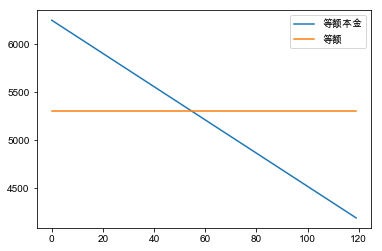

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
r= 0.05/12
MP_fix = np.ones(len(MP))*500000* (r*(1+r)**120)/ ((1+r)**120 -1 )
plt.plot(MP,label ='等额本金')
plt.plot(MP_fix,label='等额')
plt.legend(loc='upper right')
plt.show()

## hw06

### Q1

贷款100万元，如果20年还清，年贷款利率为6%，如果按照等额还款，每月需要还款多少，如果按照等额本金还款，绘制每月还款额度

通过做图画比较，两种还款方式，每月还款的本金，利息以及总还款额和剩余本金(绘制图形，展示两种方式下，每月的还款额，本金以及利息和剩余本金）

以及两种还款方式下，两种还款方式下总还款额的差值。

In [7]:
#用公式
r =0.06/12
MP1 = 1000000* (r*(1+r)**240)/ ((1+r)**240 -1 )
print ('每月贷款应还款为%.2f元' % MP1)

每月贷款应还款为7164.31元


In [8]:
# # # # # # 等额本金还款
def AJvarPayment(Num,B,Rate):
    MB = B/Num #每月本金
    # 初始化相关变量
    IR = [0]*Num #每月利息
    YE = [0]*Num #每月贷款余额
    MP = [0]*Num  #每月还款额
    YE[0] = B
    for i in range(0,Num):
        IR[i] = YE[i] * Rate
        MP[i] = MB + IR[i]
        if i < Num - 1:
            YE[i + 1] = YE[i] - MB
    return MP
# 设置参数
Rate = 0.06/12
Num =240
B =1000000
MP = AJvarPayment(Num,B,Rate)
print ('每月贷款应还款为%s \n' % MP)

每月贷款应还款为[9166.666666666668, 9145.833333333334, 9125.0, 9104.166666666668, 9083.333333333336, 9062.500000000002, 9041.666666666668, 9020.833333333336, 9000.000000000002, 8979.166666666668, 8958.333333333336, 8937.500000000004, 8916.66666666667, 8895.833333333336, 8875.000000000004, 8854.16666666667, 8833.333333333336, 8812.500000000004, 8791.666666666672, 8770.833333333338, 8750.000000000004, 8729.166666666672, 8708.333333333338, 8687.500000000004, 8666.666666666672, 8645.83333333334, 8625.000000000005, 8604.166666666672, 8583.33333333334, 8562.500000000007, 8541.666666666673, 8520.83333333334, 8500.000000000007, 8479.166666666673, 8458.33333333334, 8437.500000000007, 8416.666666666675, 8395.833333333341, 8375.000000000007, 8354.166666666675, 8333.333333333341, 8312.500000000007, 8291.666666666675, 8270.833333333343, 8250.00000000001, 8229.166666666675, 8208.333333333343, 8187.500000000009, 8166.666666666677, 8145.833333333343, 8125.00000000001, 8104.166666666677, 8083.333333333344, 806

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

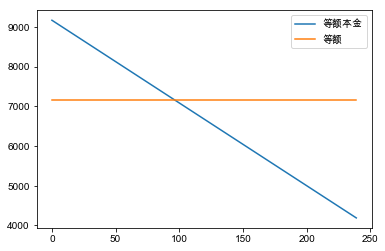

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
MP_fix = np.ones(len(MP))*MP1
plt.plot(MP,label ='等额本金')
plt.plot(MP_fix,label='等额')
plt.legend(loc='upper right')
plt.show()